In [17]:
import cv2
import skimage

import matplotlib.pyplot as plt
import numpy as np

In [18]:
im_1 = cv2.imread(r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task2\test\030_43-2-ROOT1-2023-08-08_pvdCherry_OD001_Col0_05-Fish Eye Corrected.png")
im_2 = cv2.imread(r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task2\test\030_43-19-ROOT1-2023-08-08_pvdCherry_OD001_Col0_04-Fish Eye Corrected.png")
im_3 = cv2.imread(r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task2\test\031_43-6-ROOT1-2023-08-08_control_pH7_-Fe+B_f6h1_02-Fish Eye Corrected.png")
im_4 = cv2.imread(r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task2\test\031_43-18-ROOT1-2023-08-08_pvd_OD0001_col-0_05-Fish Eye Corrected.png")
im_5 = cv2.imread(r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task2\test\032_43-6-ROOT1-2023-08-08_pvd_OD01_Col0_01-Fish Eye Corrected.png")

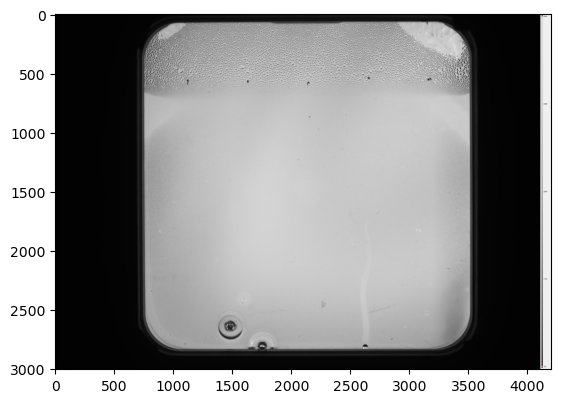

In [19]:
plt.imshow(im_1, cmap='gray')

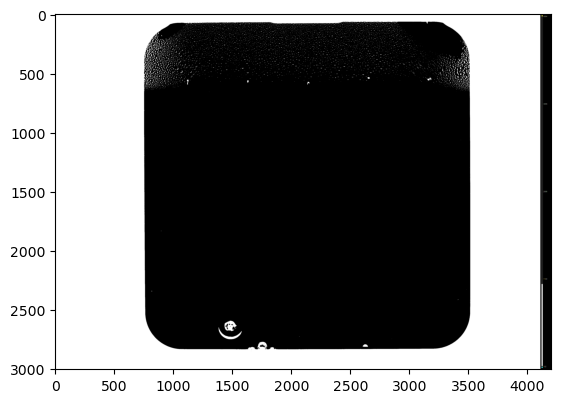

In [20]:
# im_1 = cv2.medianBlur(im_1, 5)
th, output_im = cv2.threshold(im_1, 100, 255, cv2.THRESH_BINARY_INV)
plt.imshow(output_im, cmap='gray')


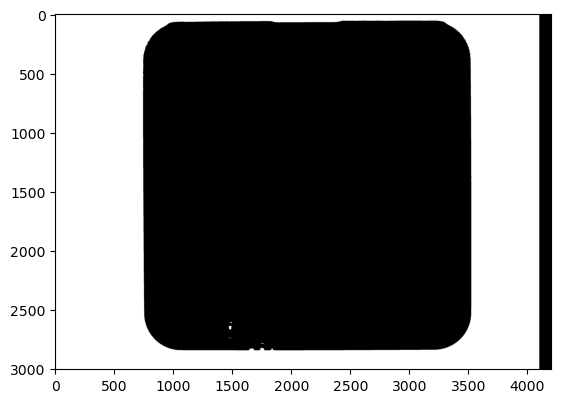

In [21]:
kernel = np.ones((3, 3), dtype="uint8")
im_1_d = cv2.dilate(output_im, kernel, iterations=1)
im_1_closing = cv2.erode(im_1_d, kernel, iterations=10)
plt.imshow(im_1_closing , cmap='gray')

In [22]:
# fig, ax = plt.subplots(2)

# ax[0].imshow(im_1_closing, cmap='gray')
# ax[0].plot([10, 4000], [1000, 1000])
# ax[0].axis('off')

# ax[1].plot(im_1_closing[1000, 10:4000])
# ax[1].set_ylabel('Pixel value')
# ax[1].set_xlabel('Pixel location on the blue line')

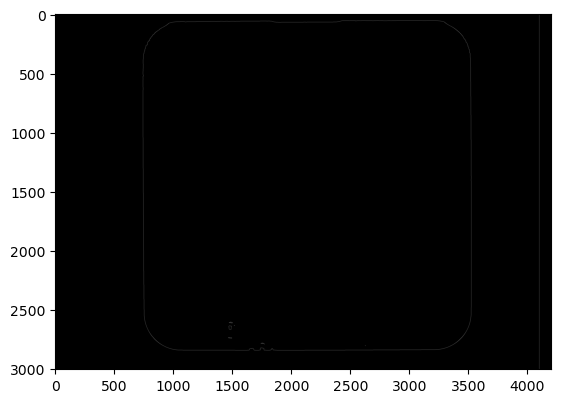

In [23]:
edges = cv2.Canny(im_1_closing, threshold1=100, threshold2=240)
plt.imshow(edges, cmap='gray')

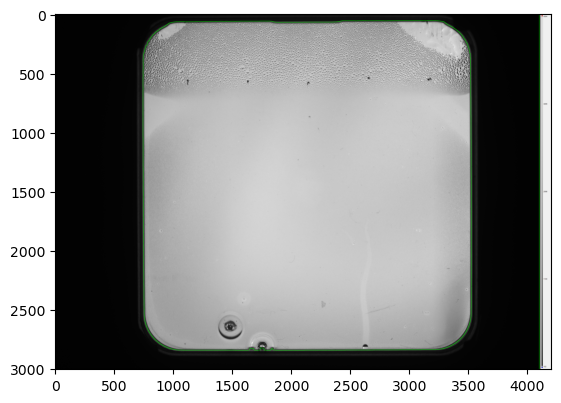

In [24]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
im_1 = cv2.drawContours(im_1, contours, contourIdx=-1, color=(0, 255, 0), thickness=2)
im_1 = cv2.cvtColor(im_1, cv2.COLOR_BGR2RGB)
plt.imshow(im_1, cmap='gray')

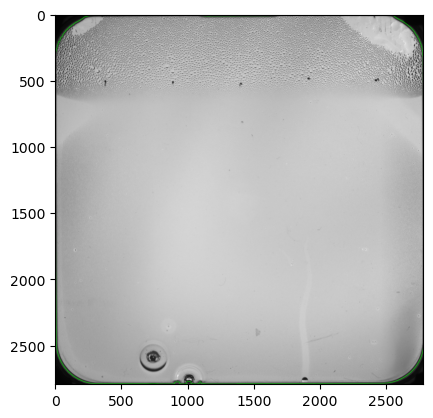

In [25]:

largest_contour = max(contours, key=cv2.contourArea)

x, y, w, h = cv2.boundingRect(largest_contour)

cropped_square = im_1[y:y + h, x:x + w]


plt.imshow(cv2.cvtColor(cropped_square, cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
largest_contour = max(contours, key=cv2.contourArea)

x, y, w, h = cv2.boundingRect(largest_contour)
 

max_side = max(w, h)
center_x = x + w // 2
center_y = y + h // 2
x = center_x - max_side // 2
y = center_y - max_side // 2

cropped_square = im_1[y:y + max_side, x:x + max_side]

In [27]:
cropped_square.shape

(2793, 2793, 3)

test error


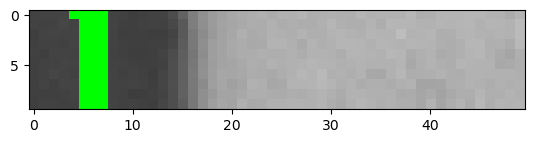

In [28]:
plt.imshow(cropped_square[990:1000, 0:50])

Text(0.5, 0, 'Pixel location on the blue line')

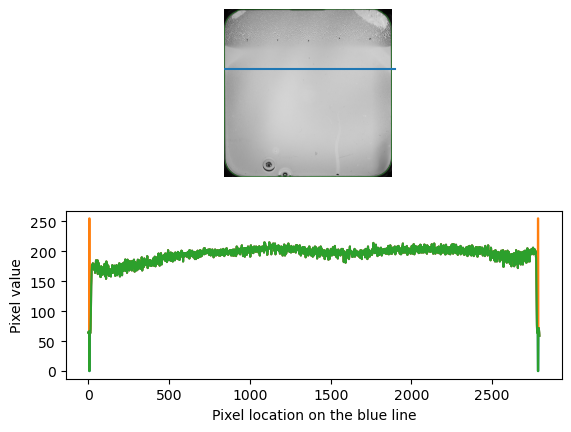

In [29]:


fig, ax = plt.subplots(2)

ax[0].imshow(cropped_square, cmap='gray')
ax[0].plot([0, 2847], [1000, 1000])
ax[0].axis('off')

ax[1].plot(cropped_square[1000, 0: 2847])
ax[1].set_ylabel('Pixel value')
ax[1].set_xlabel('Pixel location on the blue line')

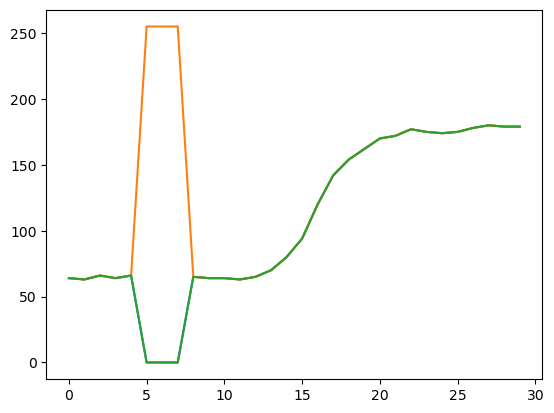

In [30]:
plt.plot(cropped_square[1000, 0:30])

___


## im_2

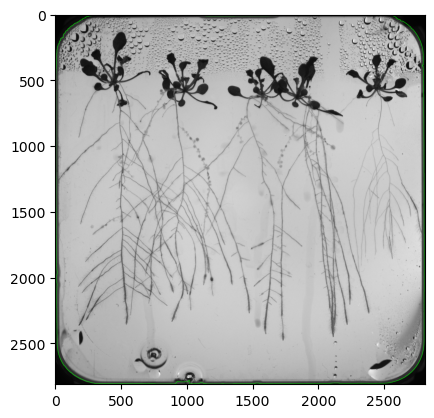

In [31]:
# im_2 = cv2.medianBlur(im_2, 5)
th, output_im = cv2.threshold(im_2, 100, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((5, 5), dtype="uint8")
im_2_d = cv2.dilate(output_im, kernel, iterations=1)
im_2_closing = cv2.erode(im_2_d, kernel, iterations=10)

edges = cv2.Canny(im_2_closing, threshold1=100, threshold2=240)

contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
im_2 = cv2.drawContours(im_2, contours, contourIdx=-1, color=(0, 255, 0), thickness=2)
im_2 = cv2.cvtColor(im_2, cv2.COLOR_BGR2RGB)

largest_contour = max(contours, key=cv2.contourArea)

x, y, w, h = cv2.boundingRect(largest_contour)
max_side = max(w, h)
center_x = x + w // 2
center_y = y + h // 2
x = center_x - max_side // 2
y = center_y - max_side // 2
    
        
cropped_square = im_2[y:y + max_side, x:x + max_side]


plt.imshow(cv2.cvtColor(cropped_square, cv2.COLOR_BGR2RGB))
plt.show()

## All images

(2847, 2847, 3)


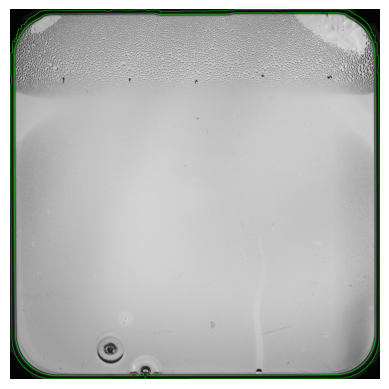

(2847, 2847, 3)


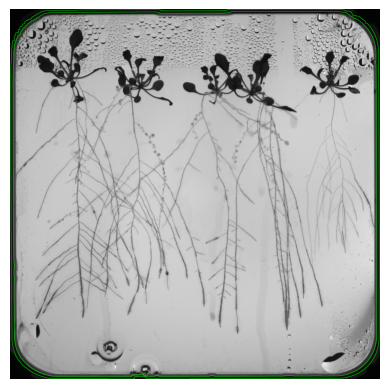

(2847, 2847, 3)


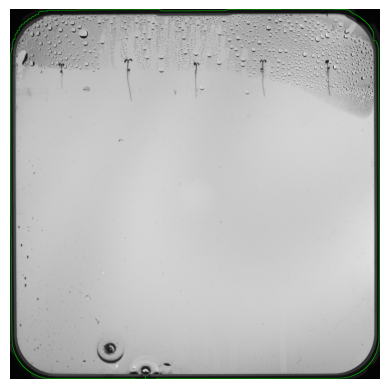

(2846, 2846, 3)


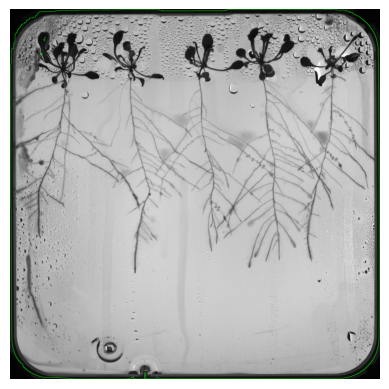

(2846, 2846, 3)


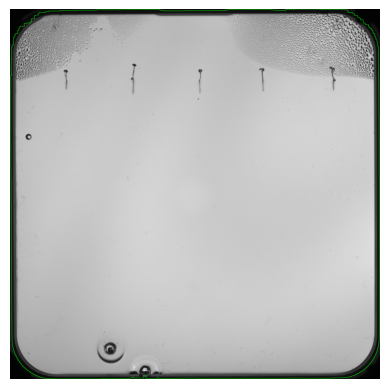

In [32]:

def show_cropped_square(image):
   
    
    th, output_im = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((9, 9), dtype="uint8")
    im_d = cv2.dilate(output_im, kernel, iterations=1)
    im_closing = cv2.erode(im_d, kernel, iterations=10)
    edges = cv2.Canny(im_closing, threshold1=100, threshold2=240)
    
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    im = cv2.drawContours(image, contours, contourIdx=-1, color=(0, 255, 0), thickness=2)
    im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    largest_contour = max(contours, key=cv2.contourArea)
    
    x, y, w, h = cv2.boundingRect(largest_contour)

    max_side = max(w, h)
    center_x = x + w // 2
    center_y = y + h // 2
    x = center_x - max_side // 2
    y = center_y - max_side // 2
    
        
    cropped_square = image[y:y + max_side, x:x + max_side]

    
    print(cropped_square.shape)
   
    plt.imshow(cv2.cvtColor(cropped_square, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


    
show_cropped_square(im_1)
show_cropped_square(im_2)
show_cropped_square(im_3)
show_cropped_square(im_4)
show_cropped_square(im_5)
